In [1]:
%matplotlib notebook

#Packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
# Define Input data
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)

<IPython.core.display.Javascript object>


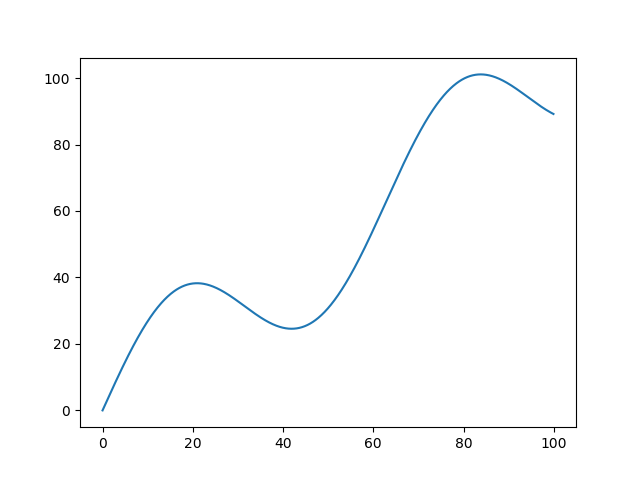

In [6]:
#Plotting
plt.plot(X_data, y_data)

In [29]:
#Number Samplesand Batchsize
n_samples = 1000
batch_size= 250

In [8]:
#Reshape column to row
X_data = np.reshape(X_data, (n_samples, 1))
y_data = np.reshape(y_data, (n_samples, 1))



In [9]:
# Set feature, label placeholder with proper batchsize
#X = tf.placeholder(tf.float32, shape = (batch_size, 1))
#y = tf.placeholder(tf.float32, shape = (batch_size, 1))

X = tf.placeholder(tf.float32, shape = (None, 1))
y = tf.placeholder(tf.float32, shape = (None, 1))

In [10]:
#Linear Regression model
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1,1),
                        initializer = tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,),
                        initializer = tf.constant_initializer(0.0))
    y_pred = tf.matmul(X,W) + b
    loss = tf.reduce_sum((y - y_pred)**2 / n_samples)

In [11]:
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)


In [30]:
with tf.Session() as sess:
    #Initialize Variables in graph
    sess.run(tf.global_variables_initializer())
    for _ in range(50000):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Do gradient descent step
        _, loss_val, y_hat = sess.run([opt_operation, loss, y_pred], feed_dict={X: X_batch, y: y_batch})
    y_hat, y_true = sess.run([y_pred, y], feed_dict= {X: X_data, y:y_data})

In [31]:
print(loss_val)

42.0532


In [32]:
np.shape(y_hat)

(1000, 1)

<IPython.core.display.Javascript object>


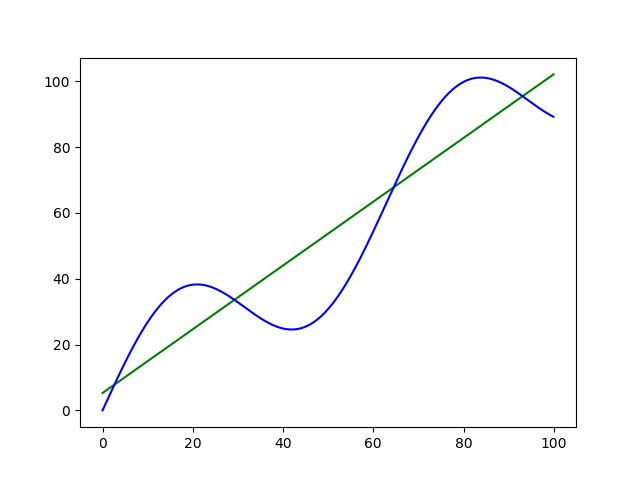

In [34]:
plt.plot(X_data, y_hat, 'g',X_data,  y_true, 'b')